In [1]:
# Load in packages
library(tidyverse)
library(data.table)
library(readxl)
library(dplyr)
library(stringr)
library(ggplot2)
install.packages("ggbreak")
library(ggbreak)
library(tidyr)
install.packages("ggpubr")
library(ggpubr)
install.packages("gt", type = "binary")
library(gt)
library(gridExtra)
library(patchwork)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose





The downloaded binary packages are in
	/var/folders/d3/vjc_50q165z6232gypbw3sq40000gp/T//Rtmp2U8PTx/downloaded_packages


ggbreak v0.1.2

If you use ggbreak in published research, please cite the following
paper:

S Xu, M Chen, T Feng, L Zhan, L Zhou, G Yu. Use ggbreak to effectively
utilize plotting space to deal with large datasets and outliers.
Frontiers in Genetics. 2021, 12:774846. doi: 10.3389/fgene.2021.774846





The downloaded binary packages are in
	/var/folders/d3/vjc_50q165z6232gypbw3sq40000gp/T//Rtmp2U8PTx/downloaded_packages

The downloaded binary packages are in
	/var/folders/d3/vjc_50q165z6232gypbw3sq40000gp/T//Rtmp2U8PTx/downloaded_packages



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
rm(list=ls())

# Load In data 

In [3]:
db_name_1 = "gnomAD"
db_name_2 = "IGM"
db_name_3 = "UKBB"

setwd("")

df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_lt50bp.csv")
df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_lt50bp.csv")
df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_lt50bp.csv")


In [4]:

rAF_hi_indels_10bp_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp10_rAF_hiIndels.lt50bp.csv")
rAF_hi_indels_20bp_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp20_rAF_hiIndels.lt50bp.csv")
rAF_hi_indels_30bp_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp30_rAF_hiIndels.lt50bp.csv")
rAF_hi_indels_40bp_df_1 = fread("gnomAD/gnomad.exomes.r2.1.1.sites_indelsonly_rAF_bp40_rAF_hiIndels.lt50bp.csv")

rAF_hi_indels_10bp_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp10_rAF_hiIndels.lt50bp.csv")
rAF_hi_indels_20bp_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp20_rAF_hiIndels.lt50bp.csv")
rAF_hi_indels_30bp_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp30_rAF_hiIndels.lt50bp.csv")
rAF_hi_indels_40bp_df_2 = fread("IGM/2023-03-23_IGM_n39367_indelsonly_rAF_bp40_rAF_hiIndels.lt50bp.csv")

rAF_hi_indels_10bp_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp10_rAF_hiIndels.lt50bp.csv")
rAF_hi_indels_20bp_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp20_rAF_hiIndels.lt50bp.csv")
rAF_hi_indels_30bp_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp30_rAF_hiIndels.lt50bp.csv")
rAF_hi_indels_40bp_df_3 = fread("UKBB/UK.BB.exomes.430k.sites_indelsonly_rAF_bp40_rAF_hiIndels.lt50bp.csv")

In [5]:
#set bp range
bp_range = c("10", "20", "30", "40")

In [6]:
#seperate var id column (not sure if ukbb has var id column)
df_1 = separate(df_1, col = VarID, into = c("CHR", "POS", "REF", "ALT"), sep = "-")
df_2 = separate(df_2, col = VarID, into = c("CHR", "POS", "REF", "ALT"), sep = "-")
#df_3 = separate(df_3, col = VarID, into = c("CHR", "POS", "REF", "ALT"), sep = "-")

In [7]:

for (i in bp_range) {
  print(i)
  
  ## Find the regions that the rAF_hi indels are in
  temp_regions_1 = distinct(get(paste0("rAF_hi_indels_", i, "bp_df_1")) %>% select(paste0("GID_bp", i)))
  temp_regions_2 = distinct(get(paste0("rAF_hi_indels_", i, "bp_df_2")) %>% select(paste0("GID_bp", i)))
  temp_regions_3 = distinct(get(paste0("rAF_hi_indels_", i, "bp_df_3")) %>% select(paste0("GID_bp", i)))
  
  temp_var = paste0("GID_bp", i)
  
  temp_df_1 = paste0("filtered_df_1_", i)
  temp_df_2 = paste0("filtered_df_2_", i)
  temp_df_3 = paste0("filtered_df_3_", i)
  
  ## Keep the regions that have at least one rAF_hi indel and have to have at least 2 indels (the second indel doesn't have to be rAF_hi)
  assign(temp_df_1,  df_1 %>% filter(df_1[[temp_var]] %in% temp_regions_1[[temp_var]]) %>% group_by(get(temp_var)) %>% filter(n()>1))
  assign(temp_df_2,  df_2 %>% filter(df_2[[temp_var]] %in% temp_regions_2[[temp_var]]) %>% group_by(get(temp_var)) %>% filter(n()>1))
  assign(temp_df_3,  df_3 %>% filter(df_3[[temp_var]] %in% temp_regions_3[[temp_var]]) %>% group_by(get(temp_var)) %>% filter(n()>1))
  
  #find start and end indels 
  assign(temp_df_1, get(temp_df_1) %>% group_by(get(temp_var)) %>% mutate(start_indel = as.numeric(min(POS)), end_indel = as.numeric(max(POS))) %>% ungroup())
  assign(temp_df_2, get(temp_df_2) %>% group_by(get(temp_var)) %>% mutate(start_indel = as.numeric(min(POS)), end_indel = as.numeric(max(POS))) %>% ungroup())
  assign(temp_df_3, get(temp_df_3) %>% group_by(get(temp_var)) %>% mutate(start_indel = as.numeric(min(POS)), end_indel = as.numeric(max(POS))) %>% ungroup())
  
  ## calculate the length of region 
  assign(temp_df_1, get(temp_df_1) %>% mutate (region_length = get(temp_df_1)$end_indel - get(temp_df_1)$start_indel))
  assign(temp_df_2, get(temp_df_2) %>% mutate (region_length = get(temp_df_2)$end_indel - get(temp_df_2)$start_indel))
  assign(temp_df_3, get(temp_df_3) %>% mutate (region_length = get(temp_df_3)$end_indel - get(temp_df_3)$start_indel))
  
  ## Get a chart with the number of regions with that region length
  temp_chart_1 = paste0("region_len_1_", i)
  temp_chart_2 = paste0("region_len_2_", i)
  temp_chart_3 = paste0("region_len_3_", i)
  
  assign(temp_chart_1, distinct(get(temp_df_1) %>% select (paste0("GID_bp", i), "region_length")))
  assign(temp_chart_2, distinct(get(temp_df_2) %>% select (paste0("GID_bp", i), "region_length")))
  assign(temp_chart_3, distinct(get(temp_df_3) %>% select (paste0("GID_bp", i), "region_length")))
  
  ## Get a graph 
  graph_df1 = paste0("graph_df1_bp", i)
  graph_df2 = paste0("graph_df2_bp", i)
  graph_df3 = paste0("graph_df3_bp", i)
  
  
  ## Make graphs 
  if (i == "10"){
    assign(graph_df1, ggplot(get(temp_chart_1), aes(x = region_length)) +
            geom_histogram(aes(y = ..density..), colour= "black", fill = "white", binwidth = 1) +
            geom_density(fill="grey", alpha = .5) +
            scale_x_continuous(breaks =seq(from = 0, to = 1000, by = 20), limits = c(0, 1000)) +
            scale_x_break(breaks = c(80, 800), scales = 0.25, ticklabels = c(800, 900, 1000)) +
            ylim(0, 0.3) +
            labs(title = paste0(i, "bp range"), x = "Region lengths (bps)", y = "Density") +
            theme(axis.text.x.top = element_blank(),axis.ticks.x.top = element_blank(), axis.line.x.top = element_blank(), axis.text=element_text(size=20), axis.text.x = element_text(angle = 90), axis.title=element_text(size=20), plot.title=element_text(size=32, hjust = 0.5, margin = margin( 1, 1, 1, 1, "cm")), plot.margin = margin( 2, 2, 2, 2, "cm"), axis.title.y = element_text(margin = margin( 1, 1, 1, 1, "cm"), angle = 90)))
  
    assign(graph_df2, ggplot(get(temp_chart_2), aes(x = region_length)) +
             geom_histogram(aes(y = ..density..), colour= "black", fill = "white", binwidth = 1) +
             geom_density(fill="grey", alpha = .5) +
             scale_x_continuous(breaks =seq(from = 0, to = 1000, by = 20), limits = c(0, 1000)) +
             scale_x_break(breaks = c(80, 800), scales = 0.25, ticklabels = c(800, 900, 1000)) +
             ylim(0, 0.3) +
             labs(title = paste0(" "), x = "Region lengths (bps)", y = "Density") +
             theme(axis.text.x.top = element_blank(),axis.ticks.x.top = element_blank(), axis.line.x.top = element_blank(), axis.text=element_text(size=20),  axis.text.x = element_text(angle = 90), axis.title=element_text(size=20), plot.title=element_text(size=32, hjust = 0.5, margin = margin( 1, 1, 1, 1, "cm")), plot.margin = margin( 2, 2, 2, 2, "cm"), axis.title.y = element_text(margin = margin( 1, 1, 1, 1, "cm"), angle = 90)))
  
    assign(graph_df3, ggplot(get(temp_chart_3), aes(x = region_length)) +
            geom_histogram(aes(y = ..density..), colour= "black", fill = "white", binwidth = 1) +
            geom_density(fill="grey", alpha = .5) + 
            scale_x_continuous(breaks =seq(from = 0, to = 1000, by = 20), limits = c(0, 1000)) + 
            scale_x_break(breaks = c(80, 800), scales = 0.25, ticklabels = c(800, 900, 1000)) +
            ylim(0, 0.3) + 
            labs(title = paste0(" "), x = "Region lengths (bps)", y = "Density") + 
            theme(axis.text.x.top = element_blank(),axis.ticks.x.top = element_blank(), axis.line.x.top = element_blank(), axis.text=element_text(size=20),  axis.text.x = element_text(angle = 90), axis.title=element_text(size=20), plot.title=element_text(size=32, hjust = 0.5, margin = margin( 1, 1, 1, 1, "cm")), plot.margin = margin( 2, 2, 2, 2, "cm"), axis.title.y = element_text(margin = margin( 1, 1, 1, 1, "cm"), angle = 90)))
  }
  #makes graphs without y axis
  if ( i != "10"){
    assign(graph_df1, ggplot(get(temp_chart_1), aes(x = region_length)) +
             geom_histogram(aes(y = ..density..), colour= "black", fill = "white", binwidth = 1) +
             geom_density(fill="grey", alpha = .5) +
             scale_x_continuous(breaks =seq(from = 0, to = 1000, by = 20), limits = c(0, 1000)) +
             scale_x_break(breaks = c(80, 800), scales = 0.25, ticklabels = c(800, 900, 1000)) +
             ylim(0, 0.3) +
             labs(title = paste0(i, "bp range"), x = "Region lengths (bps)") +
             theme(axis.text.y = element_blank(), axis.title.y = element_blank(), axis.ticks.y = element_blank(), axis.line.y = element_blank(), axis.text.x.top = element_blank(),axis.ticks.x.top = element_blank(), axis.line.x.top = element_blank(), axis.text=element_text(size=20), axis.text.x = element_text(angle = 90), axis.title=element_text(size=20), plot.title=element_text(size=32, hjust = 0.5, margin = margin( 1, 1, 1, 1, "cm")), plot.margin = margin( 2, 2, 2, 2, "cm")))
    assign(graph_df2, ggplot(get(temp_chart_2), aes(x = region_length)) +
             geom_histogram(aes(y = ..density..), colour= "black", fill = "white", binwidth = 1) +
             geom_density(fill="grey", alpha = .5) +
             scale_x_continuous(breaks =seq(from = 0, to = 1000, by = 20), limits = c(0, 1000)) +
             scale_x_break(breaks = c(80, 800), scales = 0.25, ticklabels = c(800, 900, 1000)) +
             ylim(0, 0.3) +
             labs(title = paste0(" "), x = "Region lengths (bps)") +
             theme(axis.text.y = element_blank(), axis.title.y = element_blank(), axis.ticks.y = element_blank(), axis.line.y = element_blank(),axis.text.x.top = element_blank(),axis.ticks.x.top = element_blank(), axis.line.x.top = element_blank(), axis.text=element_text(size=20),  axis.text.x = element_text(angle = 90), axis.title=element_text(size=20), plot.title=element_text(size=32, hjust = 0.5, margin = margin( 1, 1, 1, 1, "cm")), plot.margin = margin( 2, 2, 2, 2, "cm")))
    
    assign(graph_df3, ggplot(get(temp_chart_3), aes(x = region_length)) +
             geom_histogram(aes(y = ..density..), colour= "black", fill = "white", binwidth = 1) +
             geom_density(fill="grey", alpha = .5) + 
             scale_x_continuous(breaks =seq(from = 0, to = 1000, by = 20), limits = c(0, 1000)) + 
             scale_x_break(breaks = c(80, 800), scales = 0.25, ticklabels = c(800, 900, 1000)) +
             ylim(0, 0.3) + 
             labs(title = paste0(" "), x = "Region lengths (bps)") + 
             theme(axis.text.y = element_blank(), axis.title.y = element_blank(), axis.ticks.y = element_blank(), axis.line.y = element_blank(),axis.text.x.top = element_blank(),axis.ticks.x.top = element_blank(), axis.line.x.top = element_blank(), axis.text=element_text(size=20),  axis.text.x = element_text(angle = 90), axis.title=element_text(size=20), plot.title=element_text(size=32, hjust = 0.5, margin = margin( 1, 1, 1, 1, "cm")), plot.margin = margin( 2, 2, 2, 2, "cm")))
    
    
    
    
  }
}


[1] "10"
[1] "20"
[1] "30"
[1] "40"


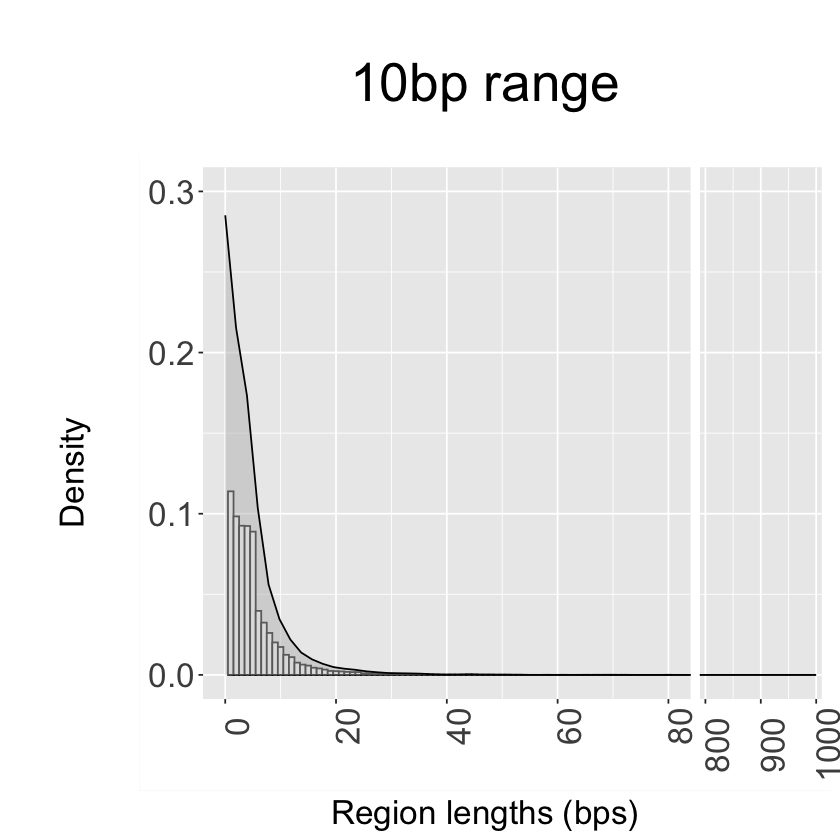

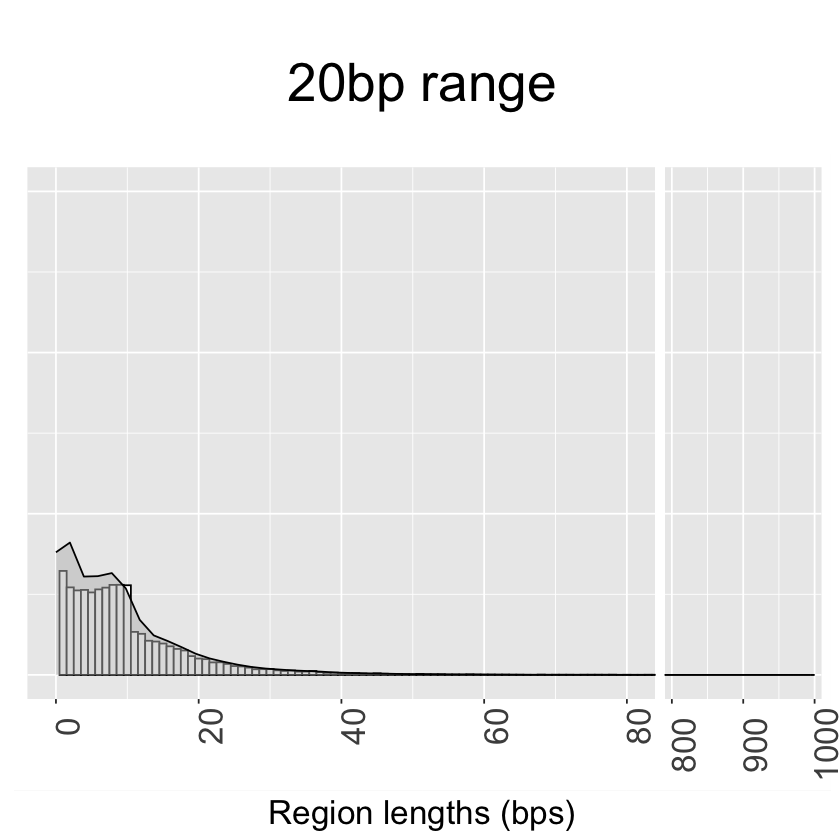

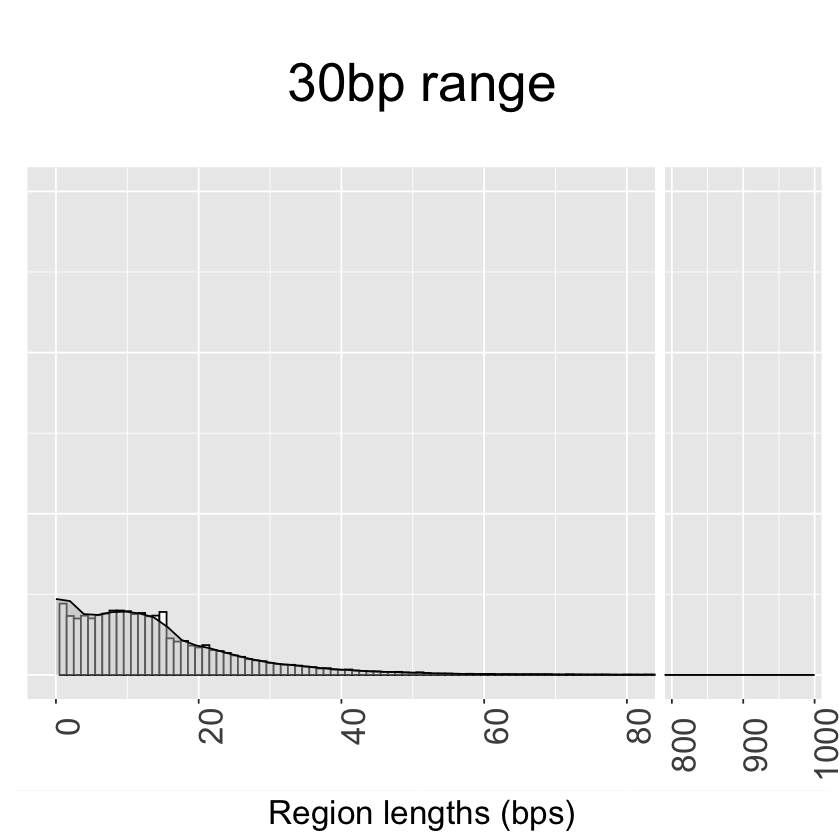

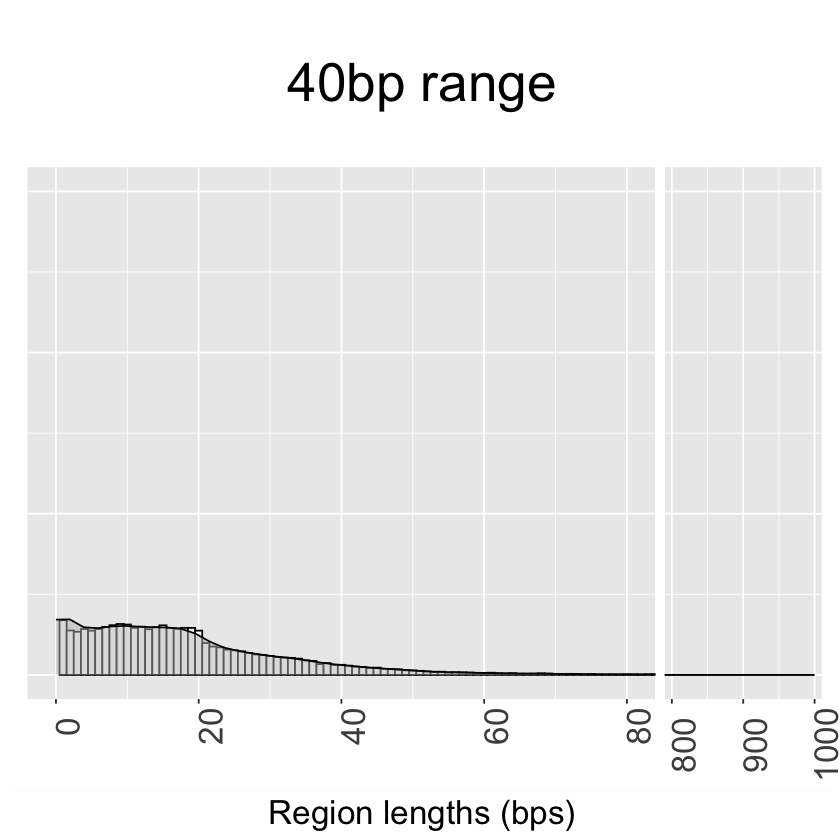

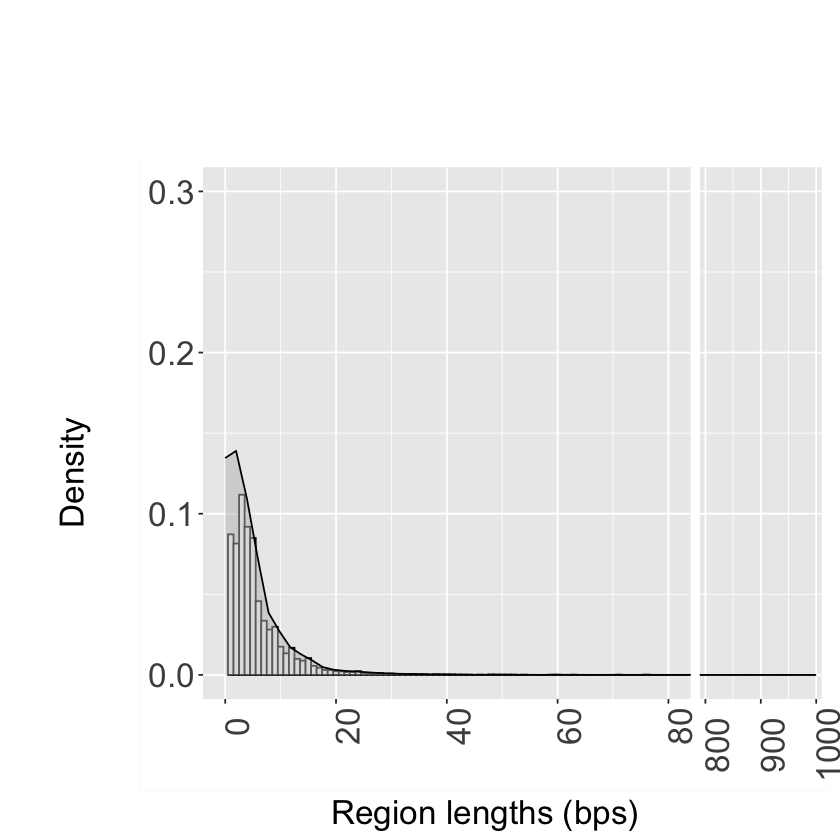

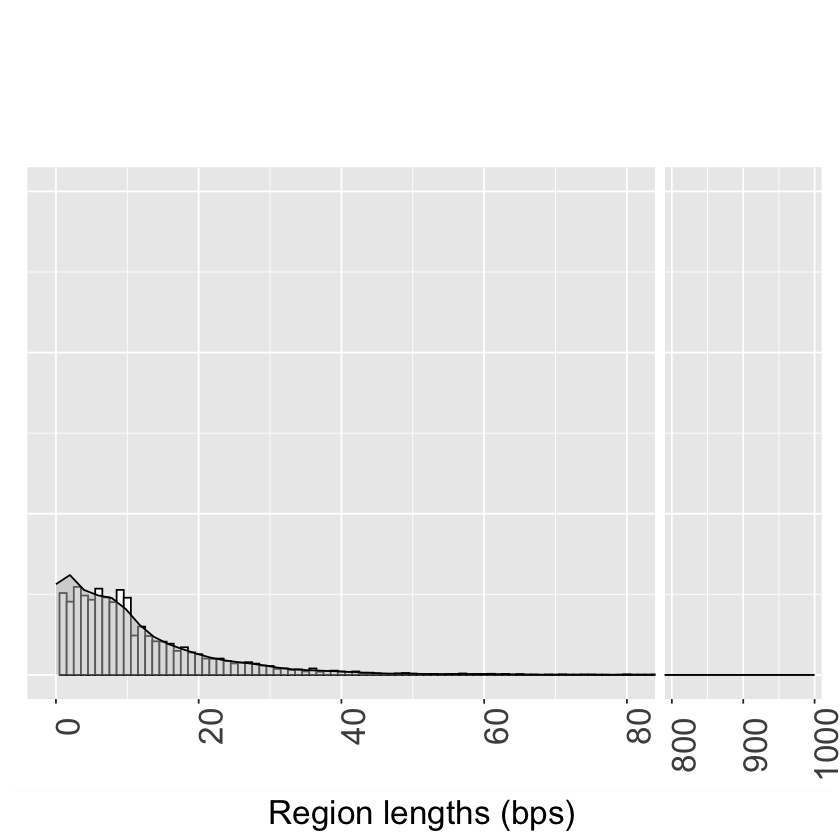

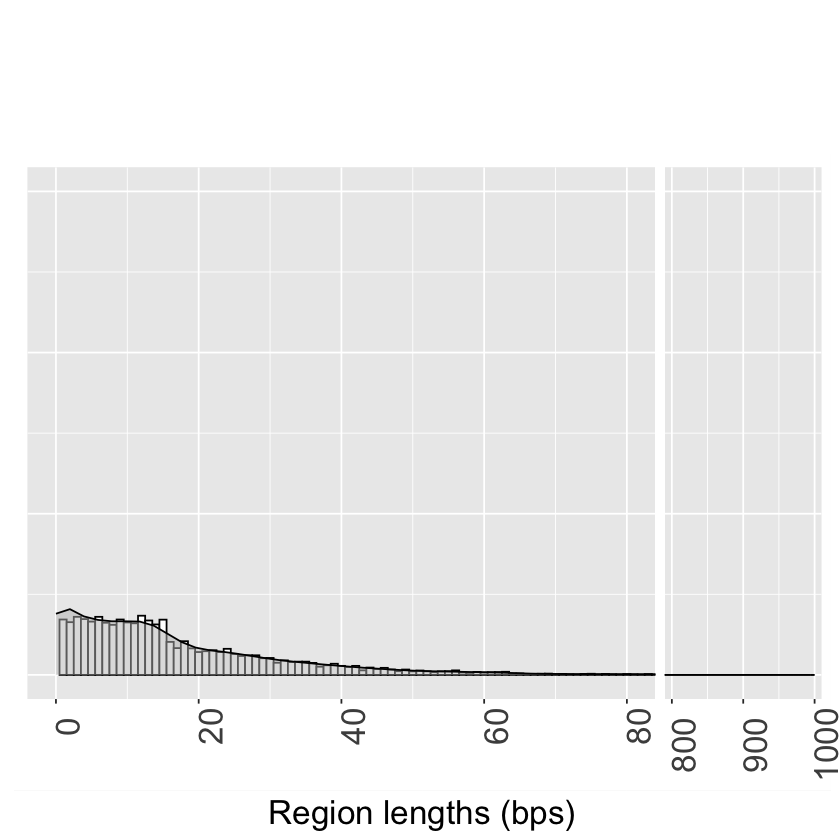

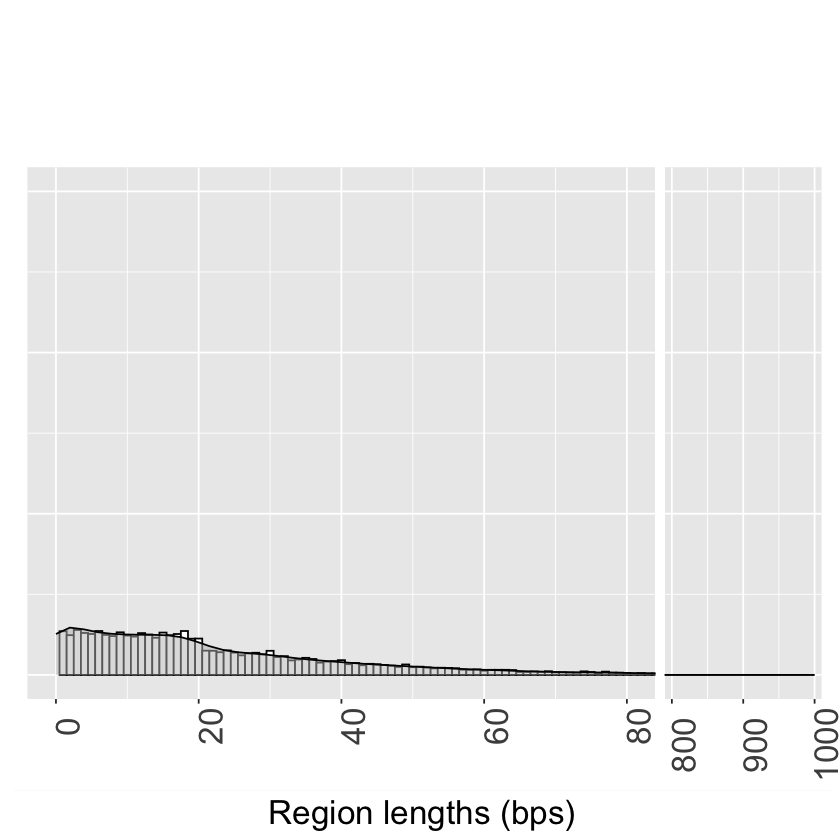

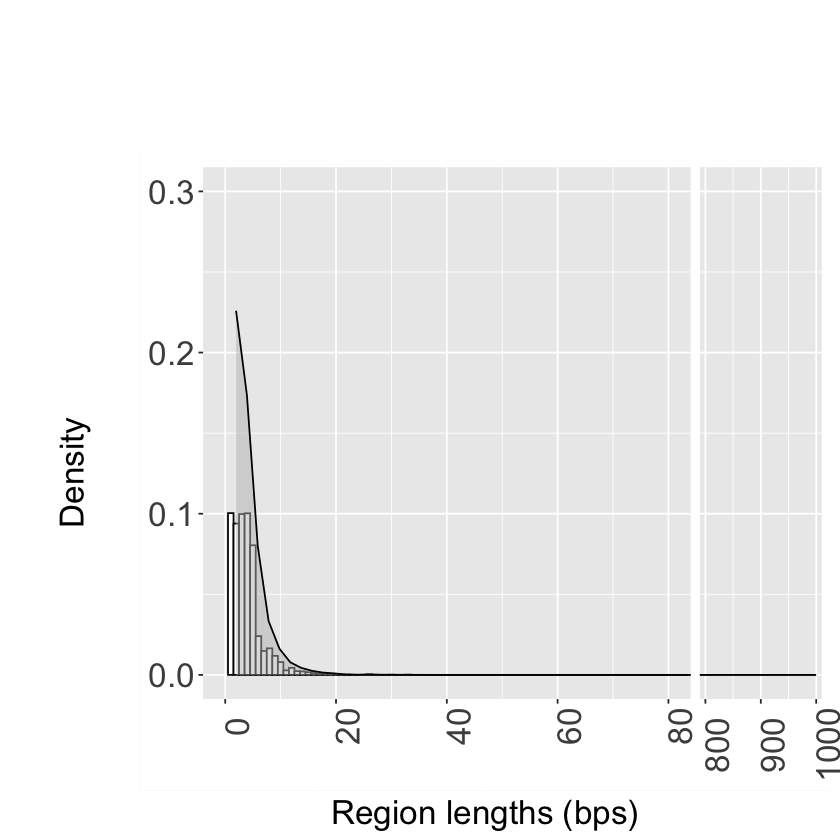

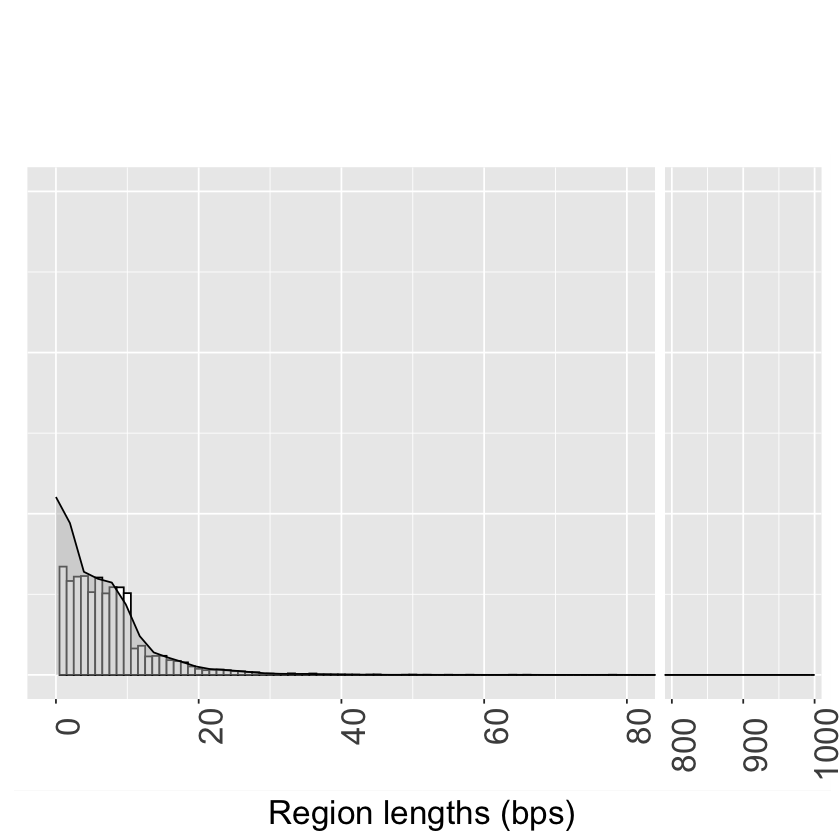

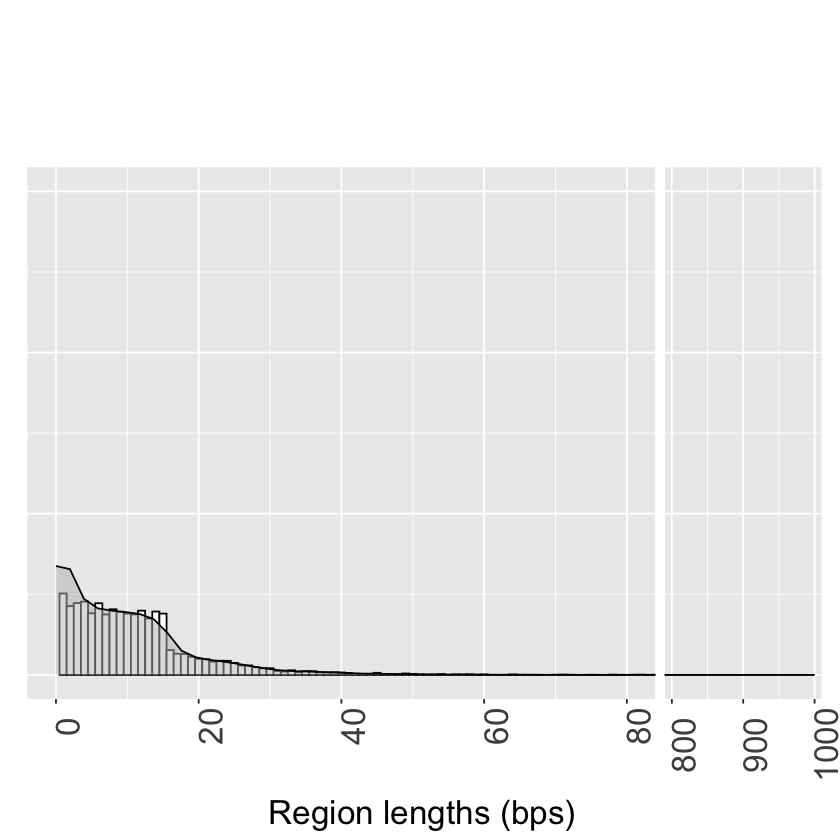

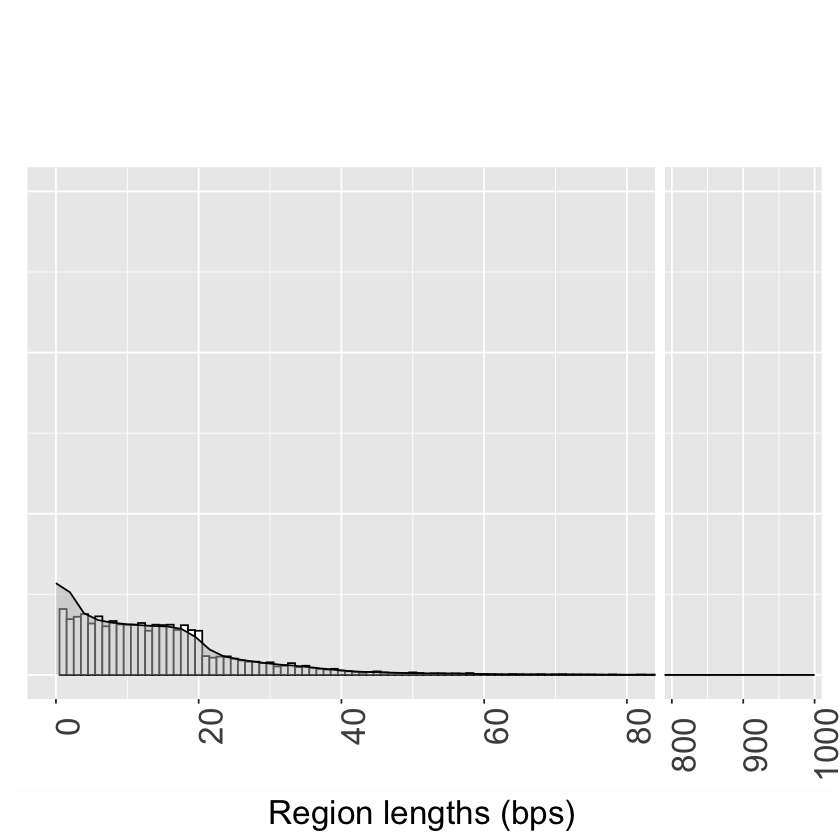

In [8]:

# manually scales some of the graphs beacuse the graphs with the y axis would appear visually smaller then the graphs without the y axis
scaled_graph_df1_bp10 <- print(graph_df1_bp10) + theme(plot.margin = margin(0, .2,  0, -2.7, "cm"))
scaled_graph_df1_bp20 <- print(graph_df1_bp20) + theme(plot.margin = margin( 0, .2, 0, 0, "cm"))
scaled_graph_df1_bp30 <- print(graph_df1_bp30) + theme(plot.margin = margin( 0, .2, 0, 0, "cm"))
scaled_graph_df1_bp40 <- print(graph_df1_bp40) + theme(plot.margin = margin( 0, .2, 0, 0, "cm"))

scaled_graph_df2_bp10 <- print(graph_df2_bp10) + theme(plot.margin = margin(0, .2,  0, -2.7, "cm"))
scaled_graph_df2_bp20 <- print(graph_df2_bp20) + theme(plot.margin = margin( 0, .2, 0, 0, "cm"))
scaled_graph_df2_bp30 <- print(graph_df2_bp30) + theme(plot.margin = margin( 0, .2, 0, 0, "cm"))
scaled_graph_df2_bp40 <- print(graph_df2_bp40) + theme(plot.margin = margin( 0, .2, 0, 0, "cm"))

scaled_graph_df3_bp10 <- print(graph_df3_bp10) + theme(plot.margin = margin(0, .2,  0, -2.7, "cm"))
scaled_graph_df3_bp20 <- print(graph_df3_bp20) + theme(plot.margin = margin( 0, .2, 0, 0, "cm"))
scaled_graph_df3_bp30 <- print(graph_df3_bp30) + theme(plot.margin = margin( 0, .2, 0, 0, "cm"))
scaled_graph_df3_bp40 <- print(graph_df3_bp40) + theme(plot.margin = margin( 0, .2, 0, 0, "cm"))


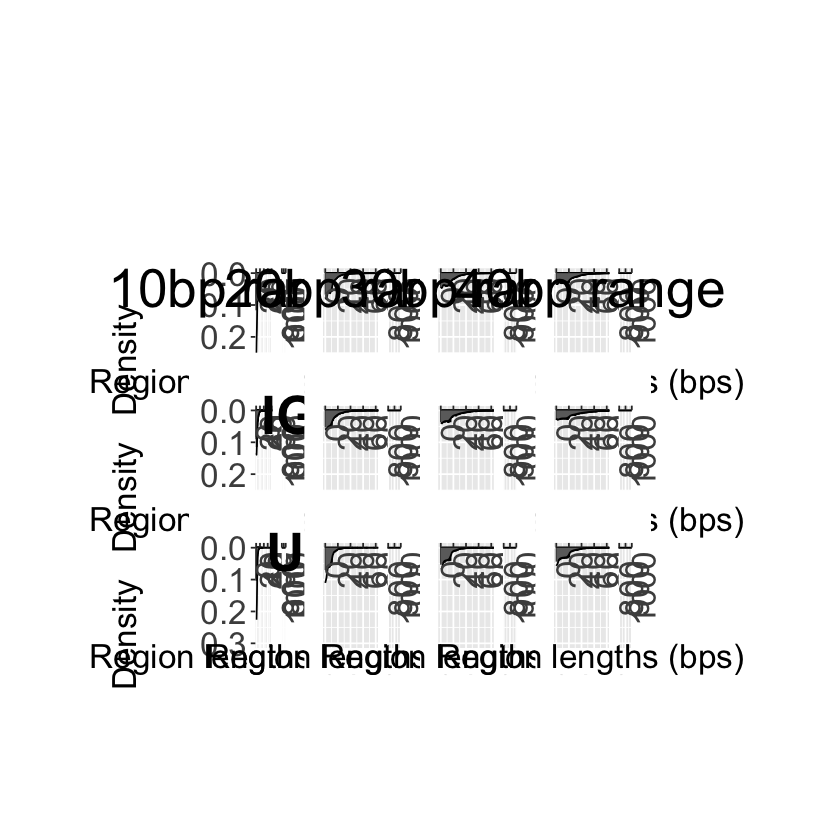

In [9]:
#make figure
figure_ = ggarrange(scaled_graph_df1_bp10,
          scaled_graph_df1_bp20,
          scaled_graph_df1_bp30,
          scaled_graph_df1_bp40,
          scaled_graph_df2_bp10,
          scaled_graph_df2_bp20,
          scaled_graph_df2_bp30,
          scaled_graph_df2_bp40,
          scaled_graph_df3_bp10,
          scaled_graph_df3_bp20,
          scaled_graph_df3_bp30,
          scaled_graph_df3_bp40,
          labels = c(" ", " ", " ", " ", " IGM", " ", " ", " ", "UKBB", " ", " ", " "),
          ncol = 4, nrow = 3, font.label = list(size = 32, color = "black")) + theme(plot.margin = unit(c(2,2,2,2), "cm"))

# added the gnomAD label this way so it would not overlap with the grpah title
labled_figure <- annotate_figure(figure_,
                               top = text_grob("gnomAD", 
                                               color = "black", 
                                               face = "bold", 
                                               size = 32, 
                                               hjust = 7.3,
                                               vjust = 4))

# Adjust the margins of the plot for better appearance
labled_figure + theme(plot.margin = unit(c(2, 2, 2, 2), "cm"))

setwd("")

ggsave("Fig2.jpg", width = 80, height = 60, units = c("cm"), dpi = 300)



In [10]:

## To find the mean and median region lengths.
for (i in bp_range) {
  # get the dataframe with all the indels in a region with a rAF_hi indel
  temp_var1 = paste0("filtered_df_1_", i)
  temp_var2 = paste0("filtered_df_2_", i)
  temp_var3 = paste0("filtered_df_3_", i)

  # find mean and median
  mean_df1 = paste0("mean_region_len_df1_bp", i)
  mean_df2 = paste0("mean_region_len_df2_bp", i)
  mean_df3 = paste0("mean_region_len_df3_bp", i)

  gID = paste0("GID_bp", i)


  ## remember: got to collapse by gID
  assign(mean_df1, mean(unique(get(temp_var1) %>% select(gID, region_length))$region_length))
  assign(mean_df2, mean(unique(get(temp_var2) %>% select(gID, region_length))$region_length))
  assign(mean_df3, mean(unique(get(temp_var3) %>% select(gID, region_length))$region_length))

  median_df1 = paste0("median_region_len_df1_bp", i)
  median_df2 = paste0("median_region_len_df2_bp", i)
  median_df3 = paste0("median_region_len_df3_bp", i)

  assign(median_df1, median(unique(get(temp_var1) %>% select(gID, region_length))$region_length))
  assign(median_df2, median(unique(get(temp_var2) %>% select(gID, region_length))$region_length))
  assign(median_df3, median(unique(get(temp_var3) %>% select(gID, region_length))$region_length))

  print(paste0("Mean region length for ", db_name_1, " and bp region ", i, ": ", get(mean_df1)))
  print(paste0("Mean region length for ", db_name_2, " and bp region ", i, ": ", get(mean_df2)))
  print(paste0("Mean region length for ", db_name_3, " and bp region ", i, ": ", get(mean_df3)))

  print(paste0("Median region length for ", db_name_1, " and bp region ", i, ": ", get(median_df1)))
  print(paste0("Median region length for ", db_name_2, " and bp region ", i, ": ", get(median_df2)))
  print(paste0("Median region length for ", db_name_3, " and bp region ", i, ": ", get(median_df3)))
}


Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(gID)

  # Now:
  data %>% select(all_of(gID))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


[1] "Mean region length for gnomAD and bp region 10: 3.76431518044781"
[1] "Mean region length for IGM and bp region 10: 4.223479652492"
[1] "Mean region length for UKBB and bp region 10: 2.21178066266227"
[1] "Median region length for gnomAD and bp region 10: 2"
[1] "Median region length for IGM and bp region 10: 3"
[1] "Median region length for UKBB and bp region 10: 1"
[1] "Mean region length for gnomAD and bp region 20: 8.56280709736124"
[1] "Mean region length for IGM and bp region 20: 10.0574041642343"
[1] "Mean region length for UKBB and bp region 20: 5.25295926210607"
[1] "Median region length for gnomAD and bp region 20: 6"
[1] "Median region length for IGM and bp region 20: 7"
[1] "Median region length for UKBB and bp region 20: 4"
[1] "Mean region length for gnomAD and bp region 30: 13.2616019540133"
[1] "Mean region length for IGM and bp region 30: 16.2973681909592"
[1] "Mean region length for UKBB and bp region 30: 8.70743567231715"
[1] "Median region length for gnomAD and

In [11]:


for (i in bp_range) {

  ## get the region_len dataframe
  ben_len_1 = paste0("region_len_1_", i)
  ben_len_2 = paste0("region_len_2_", i)
  ben_len_3 = paste0("region_len_3_", i)

  ## assign the count region variable
  count_region_1 = paste0("count_region", i, "_df1")
  count_region_2 = paste0("count_region", i, "_df2")
  count_region_3 = paste0("count_region", i, "_df3")

  assign(count_region_1, get(ben_len_1) %>% group_by(region_length) %>% count(region_length))
  assign(count_region_2, get(ben_len_2) %>% group_by(region_length) %>% count(region_length))
  assign(count_region_3, get(ben_len_3) %>% group_by(region_length) %>% count(region_length))

  ## find the percentage
  percent_df1 = paste0("percent_lt_", i, "bp_region_", i, "df1")
  percent_df2 = paste0("percent_lt_", i, "bp_region_", i, "df2")
  percent_df3 = paste0("percent_lt_", i, "bp_region_", i, "df3")

  assign(percent_df1, sum((get(count_region_1) %>% filter(region_length < as.numeric(i)))$n) / sum(get(count_region_1)$n) * 100 )
  assign(percent_df2, sum((get(count_region_2) %>% filter(region_length < as.numeric(i)))$n) / sum(get(count_region_2)$n) * 100 )
  assign(percent_df3, sum((get(count_region_3) %>% filter(region_length < as.numeric(i)))$n) / sum(get(count_region_3)$n) * 100 )

  print(paste0("Percent less than ", i, " bps, region ", i, " is ", get(percent_df1), "% for dataset ", db_name_1))
  print(paste0("Percent less than ", i, " bps, region ", i, " is ", get(percent_df2), "% for dataset ", db_name_2))
  print(paste0("Percent less than ", i, " bps, region ", i, " is ", get(percent_df3), "% for dataset ", db_name_3))

}


[1] "Percent less than 10 bps, region 10 is 90.571569415977% for dataset gnomAD"
[1] "Percent less than 10 bps, region 10 is 88.5230909922268% for dataset IGM"
[1] "Percent less than 10 bps, region 10 is 97.4229800426274% for dataset UKBB"
[1] "Percent less than 20 bps, region 20 is 89.9476797088262% for dataset gnomAD"
[1] "Percent less than 20 bps, region 20 is 85.4835571122786% for dataset IGM"
[1] "Percent less than 20 bps, region 20 is 96.9100691775557% for dataset UKBB"
[1] "Percent less than 30 bps, region 30 is 90.5499873662933% for dataset gnomAD"
[1] "Percent less than 30 bps, region 30 is 83.6233277957506% for dataset IGM"
[1] "Percent less than 30 bps, region 30 is 96.57594381036% for dataset UKBB"
[1] "Percent less than 40 bps, region 40 is 91.4461818974573% for dataset gnomAD"
[1] "Percent less than 40 bps, region 40 is 82.582000323154% for dataset IGM"
[1] "Percent less than 40 bps, region 40 is 96.7692212836796% for dataset UKBB"


In [12]:


for (i in bp_range) {
  # get the dataframe with all the indels in a region with a rAF_hi indel
  temp_var1 = paste0("filtered_df_1_", i)
  temp_var2 = paste0("filtered_df_2_", i)
  temp_var3 = paste0("filtered_df_3_", i)

  # assign a variable for the regions
  regions_df1 = paste0 ("regions_", i, "df1")
  regions_df2 = paste0 ("regions_", i, "df2")
  regions_df3 = paste0 ("regions_", i, "df3")

  assign (regions_df1, nrow(unique(get(temp_var1)[paste0("GID_bp", i)])))
  assign (regions_df2, nrow(unique(get(temp_var2)[paste0("GID_bp", i)])))
  assign (regions_df3, nrow(unique(get(temp_var3)[paste0("GID_bp", i)])))

  print(paste0("Number of regions with rAF_hi indels in ", db_name_1, " is: ", get(regions_df1)))
  print(paste0("Number of regions with rAF_hi indels in ", db_name_2, " is: ", get(regions_df2)))
  print(paste0("Number of regions with rAF_hi indels in ", db_name_3, " is: ", get(regions_df3)))
}



[1] "Number of regions with rAF_hi indels in gnomAD is: 38543"
[1] "Number of regions with rAF_hi indels in IGM is: 8748"
[1] "Number of regions with rAF_hi indels in UKBB is: 10322"
[1] "Number of regions with rAF_hi indels in gnomAD is: 43960"
[1] "Number of regions with rAF_hi indels in IGM is: 10278"
[1] "Number of regions with rAF_hi indels in UKBB is: 13010"
[1] "Number of regions with rAF_hi indels in gnomAD is: 47492"
[1] "Number of regions with rAF_hi indels in IGM is: 11437"
[1] "Number of regions with rAF_hi indels in UKBB is: 14807"
[1] "Number of regions with rAF_hi indels in gnomAD is: 50457"
[1] "Number of regions with rAF_hi indels in IGM is: 12378"
[1] "Number of regions with rAF_hi indels in UKBB is: 16219"


In [13]:
#makesthe data frames 
df_1_regions_rAF_hi_indels = c(regions_10df1, regions_20df1, regions_30df1, regions_40df1)
df_1_mean_region_len = c(mean_region_len_df1_bp10, mean_region_len_df1_bp20, mean_region_len_df1_bp30, mean_region_len_df1_bp40)
df_1_median_region_len = c(median_region_len_df1_bp10, median_region_len_df1_bp20, median_region_len_df1_bp30, median_region_len_df1_bp40)
df_1_regions_prct_under_region_size = c(percent_lt_10bp_region_10df1, percent_lt_20bp_region_20df1, percent_lt_30bp_region_30df1, percent_lt_40bp_region_40df1)

df_1_summary = data.frame(bp_range, df_1_regions_rAF_hi_indels, df_1_mean_region_len, df_1_median_region_len, df_1_regions_prct_under_region_size)

#rounds numbers in the data frame
df_1_summary <- df_1_summary %>%
  mutate_at(vars(df_1_regions_rAF_hi_indels, df_1_mean_region_len,df_1_regions_prct_under_region_size), ~round(., 2))


# ads percent sign to the percent column
df_1_summary <- df_1_summary %>%
  mutate_at(vars(df_1_regions_prct_under_region_size), ~paste0(., "%"))

#adds commas to the numbers in the data frame
df_1_summary <- df_1_summary %>%
  mutate(df_1_regions_rAF_hi_indels = format(df_1_regions_rAF_hi_indels, big.mark = ","))

df_1_summary <- df_1_summary %>%
  mutate(bp_range = paste(bp_range = paste(bp_range,"bps")))

#renames the columns in teh data frame
colnames(df_1_summary) <- c("Max region length", "Nb. of rAF-hi genomic regions", "Mean length of rAF-hi genomic region (bp)", "Median length of rAF-hi suspicious genomic region (bp)","Proportion of rAF-hi genomic regions smaller than the max region length")

df_1_summary



#####df2 ##########

df_2_regions_rAF_hi_indels = c(regions_10df2, regions_20df2, regions_30df2, regions_40df2)
df_2_mean_region_len = c(mean_region_len_df2_bp10, mean_region_len_df2_bp20, mean_region_len_df2_bp30, mean_region_len_df2_bp40)
df_2_median_region_len = c(median_region_len_df2_bp10, median_region_len_df2_bp20, median_region_len_df2_bp30, median_region_len_df2_bp40)
df_2_regions_prct_under_region_size = c(percent_lt_10bp_region_10df2, percent_lt_20bp_region_20df2, percent_lt_30bp_region_30df2, percent_lt_40bp_region_40df2)

df_2_summary = data.frame(bp_range, df_2_regions_rAF_hi_indels, df_2_mean_region_len, df_2_median_region_len, df_2_regions_prct_under_region_size)
#rounds numbers
df_2_summary <- df_2_summary %>%
  mutate_at(vars(df_2_regions_rAF_hi_indels, df_2_mean_region_len,df_2_regions_prct_under_region_size), ~round(., 2))
# ads percent sign to the percent column
df_2_summary <- df_2_summary %>%
  mutate_at(vars(df_2_regions_prct_under_region_size), ~paste0(., "%"))
df_2_summary <- df_2_summary %>%
  mutate(df_2_regions_rAF_hi_indels = format(df_2_regions_rAF_hi_indels, big.mark = ","))

df_2_summary <- df_2_summary %>%
  mutate(bp_range = paste(bp_range = paste(bp_range,"bps")))

colnames(df_2_summary) <- c("Max region length", "Nb. of rAF-hi genomic regions", "Mean length of rAF-hi genomic region (bp)", "Median length of rAF-hi suspicious genomic region (bp)","Proportion of rAF-hi genomic regions smaller than the max region length")


df_2_summary


####df3#######


df_3_regions_rAF_hi_indels = c(regions_10df3, regions_20df3, regions_30df3, regions_40df3)
df_3_mean_region_len = c(mean_region_len_df3_bp10, mean_region_len_df3_bp20, mean_region_len_df3_bp30, mean_region_len_df3_bp40)
df_3_median_region_len = c(median_region_len_df3_bp10, median_region_len_df3_bp20, median_region_len_df3_bp30, median_region_len_df3_bp40)
df_3_regions_prct_under_region_size = c(percent_lt_10bp_region_10df3, percent_lt_20bp_region_20df3, percent_lt_30bp_region_30df3, percent_lt_40bp_region_40df3)

df_3_summary = data.frame(bp_range, df_3_regions_rAF_hi_indels, df_3_mean_region_len, df_3_median_region_len, df_3_regions_prct_under_region_size)
df_3_summary <- df_3_summary %>%
  mutate_at(vars(df_3_regions_rAF_hi_indels, df_3_mean_region_len,df_3_regions_prct_under_region_size), ~round(., 2))
# ads percent sign to the percent column
df_3_summary <- df_3_summary %>%
  mutate_at(vars(df_3_regions_prct_under_region_size), ~paste0(., "%"))

df_3_summary <- df_3_summary %>%
  mutate(df_3_regions_rAF_hi_indels = format(df_3_regions_rAF_hi_indels, big.mark = ","))
# Create the table with the title

df_3_summary <- df_3_summary %>%
  mutate(bp_range = paste(bp_range = paste(bp_range,"bps")))
colnames(df_3_summary) <- c("Range", "Nb. of rAF-hi genomic regions", "Mean length of rAF-hi genomic region (bp)", "Median length of rAF-hi genomic region (bp)","Proportion of rAF-hi genomic regions smaller than the range used")

df_3_summary



fwrite(df_1_summary, "Table_S4a_Length_of_rAF_hi_regions_in_the_gnomAD_dataset.csv")
fwrite(df_2_summary, "Table_S4b_Length_of_rAF_hi_regions_in_the_IGM_dataset.csv")
fwrite(df_3_summary, "Table_S4c_Length_of_rAF_hi_regions_in_the_UKBB_dataset.csv")


Max region length,Nb. of rAF-hi genomic regions,Mean length of rAF-hi genomic region (bp),Median length of rAF-hi suspicious genomic region (bp),Proportion of rAF-hi genomic regions smaller than the max region length
<chr>,<chr>,<dbl>,<dbl>,<chr>
10 bps,"38,543",3.76,2,90.57%
20 bps,"43,960",8.56,6,89.95%
30 bps,"47,492",13.26,10,90.55%
40 bps,"50,457",17.73,14,91.45%


Max region length,Nb. of rAF-hi genomic regions,Mean length of rAF-hi genomic region (bp),Median length of rAF-hi suspicious genomic region (bp),Proportion of rAF-hi genomic regions smaller than the max region length
<chr>,<chr>,<dbl>,<dbl>,<chr>
10 bps,"8,748",4.22,3,88.52%
20 bps,"10,278",10.06,7,85.48%
30 bps,"11,437",16.30,12,83.62%
40 bps,"12,378",22.70,16,82.58%


Range,Nb. of rAF-hi genomic regions,Mean length of rAF-hi genomic region (bp),Median length of rAF-hi genomic region (bp),Proportion of rAF-hi genomic regions smaller than the range used
<chr>,<chr>,<dbl>,<dbl>,<chr>
10 bps,"10,322",2.21,1,97.42%
20 bps,"13,010",5.25,4,96.91%
30 bps,"14,807",8.71,7,96.58%
40 bps,"16,219",12.04,10,96.77%


In [14]:

###############################################
###############################################
###############################################

# P- value calculations for tables S4



#xx$region_length
dfs = c("df_1_", "df_2_", "df_3_")

for (i in dfs){
    df_10_bp = get(paste0("filtered_",i,"10"))
    df_40_bp = get(paste0("filtered_",i,"40"))
    
    df_10_bp_uniques = paste0("df_10_bp_uniques_", i)
    df_40_bp_uniques = paste0("df_40_bp_uniques_", i)
    
    assign( df_10_bp_uniques, (unique(df_10_bp %>% select(GID_bp10, region_length))$region_length))
    assign(df_40_bp_uniques,  (unique(df_40_bp %>% select(GID_bp40, region_length))$region_length))
    
    
   # bp10_lengths = df_10_bp_uniques$region_length
  #  bp40_lengths = df_40_bp_uniques$region_length
    
    print(i)
    options(digits = 2)
    print(paste0("Mean 10bp is ", median(get(df_10_bp_uniques))))
    print(paste0("Mean 40bp is ", median(get(df_40_bp_uniques))))
    result = t.test(get(df_10_bp_uniques), get(df_40_bp_uniques), var.equal = TRUE )
    print(result)
   # print(result, digits = 4)
    print("_______________")
  
}  

[1] "df_1_"
[1] "Mean 10bp is 2"
[1] "Mean 40bp is 14"

	Two Sample t-test

data:  get(df_10_bp_uniques) and get(df_40_bp_uniques)
t = -138, df = 88998, p-value <2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14 -14
sample estimates:
mean of x mean of y 
      3.8      17.7 

[1] "_______________"
[1] "df_2_"
[1] "Mean 10bp is 3"
[1] "Mean 40bp is 16"

	Two Sample t-test

data:  get(df_10_bp_uniques) and get(df_40_bp_uniques)
t = -67, df = 21124, p-value <2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -19 -18
sample estimates:
mean of x mean of y 
      4.2      22.7 

[1] "_______________"
[1] "df_3_"
[1] "Mean 10bp is 1"
[1] "Mean 40bp is 10"

	Two Sample t-test

data:  get(df_10_bp_uniques) and get(df_40_bp_uniques)
t = -79, df = 26539, p-value <2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.1  -9.6
samp